# CosmoDC

### Goals
- How to interface QP and sacc
- How to create n(z) uncertainties from an ensemble of n(z)'s

### Requirements
- **A sacc file**: we will use the sacc file of Prat et al 2022 (2212.09345). This sacc file contains the summary statistics measured from the CosmoDC2 simulations using the DESC TXPipe pipeline. The summary statistics include the angular power spectra of the shear-shear, position-shear, and position-position correlations, as well as the cross-correlations between the different probes. The sacc file also contains the redshift distributions of the galaxies in the simulations. For more details see Prat et al 2022. The data can found in NERSC at '/global/cfs/cdirs/lsst/groups/WL/projects/star-challenge/gaussian/data_vectors'.

- **A series of QP ensenbles**: For this tutorials I have created a series of QP ensembles using the cosmoDC2_v1.1.4_image_with_photoz_v1 simulations. This catalog contains photometric redshifts that were computed with the `BPZ` template-based code (https://ui.adsabs.harvard.edu/abs/2000ApJ...536..571B/abstract) by Sam Schmidt. We use all the available pixels and impose a 24.1 magnitude cut in the i-band following Prat et al. The edges of the tomographic bins are also taken from Prat et al.

### Special Dependencies
- **sacc**: standard DESC library to load and save data.
- **nz_prior**: this very own library, used to compute n(z) uncertainties from n(z) ensembles.
- **PACC** is a plotting library (https://github.com/jaimerzpP/pacc) for sacc files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qp
import sacc
import yaml
import scipy
import nz_prior as nzp
import h5py

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

In [2]:
method = "bpz"
#source_0 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/shear_0.npz")
#source_1 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/shear_1.npz")
#source_2 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/shear_2.npz")
#source_3 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/shear_3.npz")
#source_4 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/shear_4.npz")
#lens_0 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/lens_0.npz")
#lens_1 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/lens_1.npz")
#lens_2 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/lens_2.npz")
#lens_3 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/lens_3.npz")
#lens_4 = np.load(f"/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{method}/lens_4.npz")

source_0 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/shear_0.npz")
source_1 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/shear_1.npz")
source_2 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/shear_2.npz")
source_3 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/shear_3.npz")
source_4 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/shear_4.npz")
lens_0 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/lens_0.npz")
lens_1 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/lens_1.npz")
lens_2 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/lens_2.npz")
lens_3 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/lens_3.npz")
lens_4 = np.load(f"/home/jaimerzp/Documents/UCL/nz_prior/examples/data/image_nzs_{method}/lens_4.npz")


In [3]:
f = h5py.File('/home/jaimerzp/Documents/UCL/nz_prior/examples/data/FIDUCIAL_DOUBLE.hdf5', 'r')

In [4]:
z_fid = np.linspace(0, 3, 301)
dz_fid = z_fid[1] - z_fid[0]
z_fid_edges = z_fid - dz_fid / 2
z_fid_edges = np.append(z_fid_edges, z_fid_edges[-1] + dz_fid / 2)

In [5]:
source_0 = {}
source_0["zgrid"] = z_fid_edges[0:101]
source_0["znodes"] = z_fid[0:100]
source_0["photo_hists"] = np.array(f["source"]["data"][:10000, 0, 0:100])
source_1 = {}
source_1["zgrid"] = z_fid_edges[0:101]
source_1["znodes"] = z_fid[0:100]
source_1["photo_hists"] = np.array(f["source"]["data"][:10000, 1, 0:100])
source_2 = {}
source_2["zgrid"] = z_fid_edges[20:121]
source_2["znodes"] = z_fid[20:120]
source_2["photo_hists"] = np.array(f["source"]["data"][:10000, 2, 20:120])
source_3 = {}
source_3["zgrid"] = z_fid_edges[40:141]
source_3["znodes"] = z_fid[40:140]
source_3["photo_hists"] = np.array(f["source"]["data"][:10000, 3, 40:140])
source_4 = {}
source_4["zgrid"] = z_fid_edges
source_4["znodes"] = z_fid   
source_4["photo_hists"] = np.array(f["source"]["data"][:10000, 4, :])
lens_0 = {}
lens_0["zgrid"] = z_fid_edges[13:51]
lens_0["znodes"] = z_fid[13:50]
lens_0["photo_hists"] = np.array(f["lens"]["data"][:10000, 0, 13:50])
lens_1 = {}
lens_1["zgrid"] = z_fid_edges[25:71]
lens_1["znodes"] = z_fid[25:70]
lens_1["photo_hists"] = np.array(f["lens"]["data"][:10000, 1, 25:70])
lens_2 = {}
lens_2["zgrid"] = z_fid_edges[50:91]
lens_2["znodes"] = z_fid[50:90]
lens_2["photo_hists"] = np.array(f["lens"]["data"][:10000, 2, 50:90])
lens_3 = {}
lens_3["zgrid"] = z_fid_edges[70:111]
lens_3["znodes"] = z_fid[70:110]
lens_3["photo_hists"] = np.array(f["lens"]["data"][:10000, 3, 70:110])
lens_4 = {}
lens_4["zgrid"] = z_fid_edges[80:141]
lens_4["znodes"] = z_fid[80:140]
lens_4["photo_hists"] = np.array(f["lens"]["data"][:10000, 4, 80:140])

### Load Data

In [6]:
# Sacc file
s = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

tomos = {'source_0': source_0,
        'source_1': source_1,
        'source_2': source_2,
        'source_3': source_3,
        'source_4': source_4,
        'lens_0': lens_0,
        'lens_1': lens_1,
        'lens_2': lens_2,
        'lens_3': lens_3,
        'lens_4': lens_4}

crosscorrs_method = "BinWise"

/home/jaimerzp/anaconda3/envs/gitd/lib/python3.13/site-packages/sacc/sacc.py:936: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


In [7]:
from scipy.ndimage import gaussian_filter1d
"""
nz_samples = {}
for key in tomos.keys():
    nz_true = s.tracers[key].nz#/np.sum(s.tracers[key].nz)
    z_true = s.tracers[key].z
    nz_est = np.mean(tomos[key]['photo_hists'], axis=1)/np.sum(np.mean(tomos[key]['photo_hists'], axis=1))
    z_est = tomos[key]['znodes']
    log_nz_true = np.log(nz_true + 5e-6)
    log_nz_est = np.log(nz_est)
    log_nz_true_itp = scipy.interpolate.interp1d(z_true, log_nz_true, bounds_error=False, fill_value='extrapolate')
    log_nz_true = log_nz_true_itp(z_est)
    delta = (log_nz_est - log_nz_true)
    _delta = delta/log_nz_true
    _delta_thresh = 0.4
    _delta[_delta>_delta_thresh] = _delta_thresh
    log_nz_samples = []
    for _ in range(1000):
        # Generate samples with a small perturbation around the estimated log(nz)
        sample = log_nz_est * (1 + np.random.normal(0, abs(_delta)))
        sample = gaussian_filter1d(sample, sigma=4, mode='reflect')
        log_nz_samples.append(sample)
    log_nz_samples = np.transpose(np.array(log_nz_samples))
    _nz_samples = np.exp(log_nz_samples)
    _nz_samples /= np.sum(_nz_samples, axis=0)
    nz_samples[key] = (z_est, _nz_samples.T)
"""

"\nnz_samples = {}\nfor key in tomos.keys():\n    nz_true = s.tracers[key].nz#/np.sum(s.tracers[key].nz)\n    z_true = s.tracers[key].z\n    nz_est = np.mean(tomos[key]['photo_hists'], axis=1)/np.sum(np.mean(tomos[key]['photo_hists'], axis=1))\n    z_est = tomos[key]['znodes']\n    log_nz_true = np.log(nz_true + 5e-6)\n    log_nz_est = np.log(nz_est)\n    log_nz_true_itp = scipy.interpolate.interp1d(z_true, log_nz_true, bounds_error=False, fill_value='extrapolate')\n    log_nz_true = log_nz_true_itp(z_est)\n    delta = (log_nz_est - log_nz_true)\n    _delta = delta/log_nz_true\n    _delta_thresh = 0.4\n    _delta[_delta>_delta_thresh] = _delta_thresh\n    log_nz_samples = []\n    for _ in range(1000):\n        # Generate samples with a small perturbation around the estimated log(nz)\n        sample = log_nz_est * (1 + np.random.normal(0, abs(_delta)))\n        sample = gaussian_filter1d(sample, sigma=4, mode='reflect')\n        log_nz_samples.append(sample)\n    log_nz_samples = np.tra

# Interfacing SACC and QP

In [8]:
def make_qp(ens):
    z, nzs = ens
    dz = np.mean(np.diff(z))
    zs_edges = np.concatenate(([z[0] - 0.5 * dz], z + 0.5 * dz))
    return z, qp.Ensemble(qp.hist, data={"bins":zs_edges, "pdfs":nzs})

def update_sacc_qp(s, enss):
    ss = s.copy()
    tracers = ss.tracers
    if tracers.keys() != enss.keys():
        raise ValueError("Tracers in sacc file and ensembles do not match")
    for key in tracers.keys():
        tracer = s.tracers[key]
        ens = enss[key]
        z, q = make_qp(ens)
        nz_fid_itp = scipy.interpolate.interp1d(tracer.z, tracer.nz,
            bounds_error=False, fill_value=0.0)
        nz_fid = nz_fid_itp(z)
        nz_fid /= np.sum(nz_fid)
        ss.add_tracer('Qpnz', key, q, z=z, nz=nz_fid)
    return ss

def _make_qp(ens):
    pzs = ens['photo_hists']
    z_nodes = ens['znodes']
    zs_edges = ens['zgrid']
    return z_nodes, qp.Ensemble(qp.hist, data={"bins":zs_edges, "pdfs":pzs})

def _update_sacc_qp(s, enss):
    ss = s.copy()
    tracers = ss.tracers
    if tracers.keys() != enss.keys():
        raise ValueError("Tracers in sacc file and ensembles do not match")
    for key in tracers.keys():
        ens = enss[key]
        z, q = _make_qp(ens)
        ss.add_tracer('Qpnz', key, q, z=z)
    return ss

ss_qp = _update_sacc_qp(s, tomos)
#ss_qp = update_sacc_qp(s, nz_samples)

In [9]:
def make_nzs_plots(tracers_dict, tracer_list):
    n_tracers = len(tracer_list)
    figure, axis = plt.subplots(2, n_tracers, figsize=(n_tracers*3.5,7))
    figure.subplots_adjust(wspace=0, hspace=0.01)
    for i, key in enumerate(tracer_list):
        nzs = tracers_dict[key].ensemble.objdata()['pdfs']
        nz_fid = tracers_dict[key].nz
        z = tracers_dict[key].z
        norms = np.sum(nzs, axis=1)
        nz_mean = np.mean(nzs, axis=0)
        axis[0,i].plot(z, (nzs.T/norms)[:, :100], '-', color='C0', alpha=0.1)
        axis[0,i].plot(z, nz_fid/np.sum(nz_fid), '--', color="k")
        axis[0,i].plot(z, nz_mean/np.sum(nz_mean), '-', color="k")
        cov = np.cov(nzs.T)
        err = np.sqrt(np.diag(cov))
        corr = cov/np.outer(err, err)
        nz_mean = np.mean(nzs, axis=1)
        axis[0,i].set_xlim([min(z), max(z)])
        axis[0,i].set_ylim([-0.001, 0.1])
        axis[0,i].set_title(key)
        if i == 0:
            axis[0,i].set_ylabel(r'$n_{\rm lens}(z)$')
        else:
            axis[0,i].set_yticklabels([])
            axis[1,i].set_yticklabels([])
        im = axis[1,i].imshow(corr, aspect='auto',
                            origin='lower', cmap='coolwarm',
                            vmin=-1, vmax=1,
                            extent=[min(z), max(z), max(z), min(z)])
        axis[1,i].set_xlabel(r'$z$')
        if i > 0:
            axis[1,i].set_yticklabels([])

    cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
    figure.colorbar(im, cax=cbar_ax)
    plt.show()

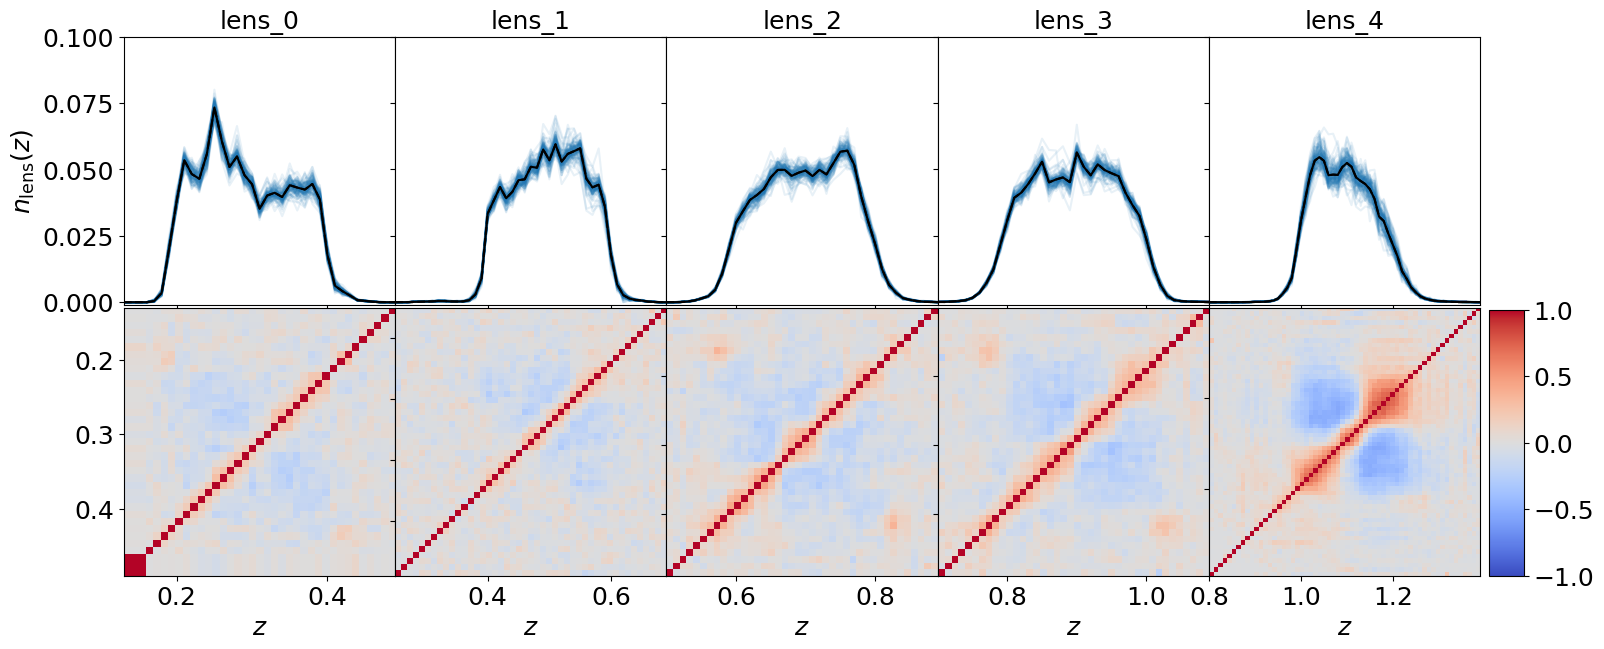

In [10]:
plot_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
make_nzs_plots(ss_qp.tracers, plot_tracers)

/tmp/ipykernel_72705/454088342.py:16: RuntimeWarning: invalid value encountered in divide
  corr = cov/np.outer(err, err)


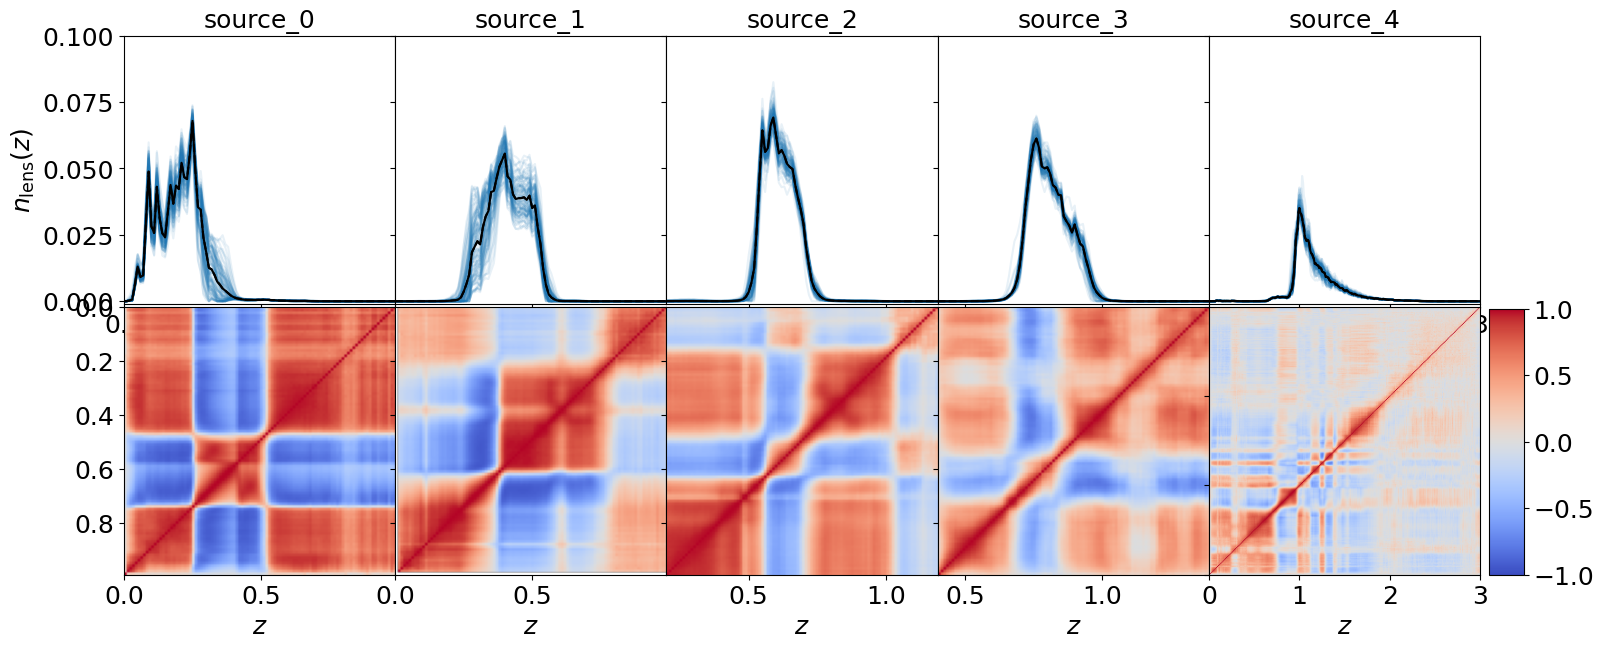

In [11]:
plot_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
make_nzs_plots(ss_qp.tracers, plot_tracers)

# Computing Uncertainties

Now we are just going to apply the methods of nz_prior described in the basic tutorial for each of the tracers in the sacc file. For the sake of brevity we will only use the qp tracers but the same can be done for the NZTracers.

## Shifts

In [12]:
shifts_priors = nzp.PriorSacc(ss_qp, 
                            model="Shifts",
                            compute_crosscorrs=crosscorrs_method)

Making model for  source_0
Making model for  source_1
Making model for  source_2
Making model for  source_3
Making model for  source_4
Making model for  lens_0
Making model for  lens_1
Making model for  lens_2
Making model for  lens_3
Making model for  lens_4


In [13]:
labels = [
    r"\Delta z^{\rm source \, 0}",
    r"\Delta z^{\rm source \, 1}",
    r"\Delta z^{\rm source \, 2}",
    r"\Delta z^{\rm source \, 3}",
    r"\Delta z^{\rm source \, 4}",
    r"\Delta z^{\rm lens \, 0}",
    r"\Delta z^{\rm lens \, 1}",
    r"\Delta z^{\rm lens \, 2}",
    r"\Delta z^{\rm lens \, 3}",
    r"\Delta z^{\rm lens \, 4}"]

Removed no burn in
Removed no burn in


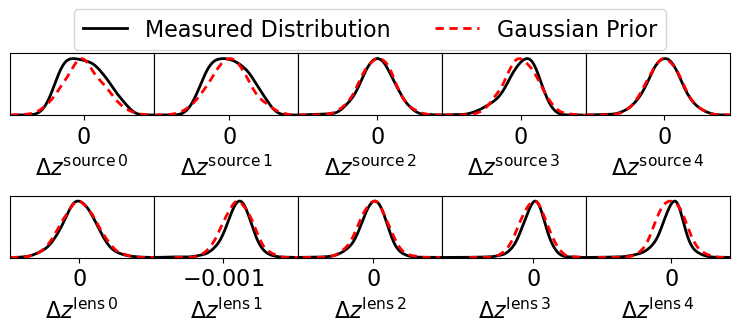

In [14]:
g = shifts_priors.plot_prior(mode="1D", add_prior=True, labels=labels, nx=5, legend_ncol=2, lws=2, ls=['-','--'])
g.export(f"/home/jaimerzp/Documents/UCL/3x2_analytical/paper_plots/shifts_prior.pdf")

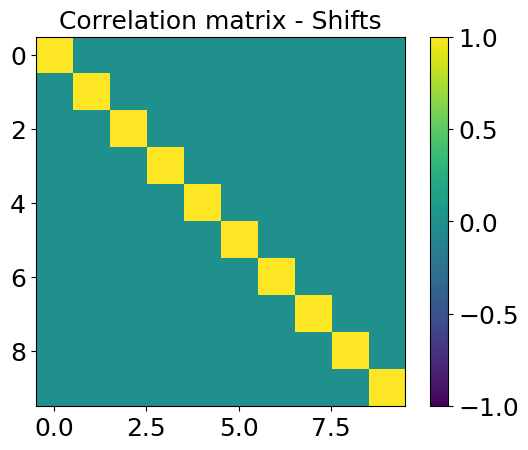

In [15]:
mean, cov, chol = shifts_priors.get_prior()
err = np.sqrt(np.diag(cov))
corr = cov/np.outer(err, err) 
plt.imshow(corr, vmin=-1, vmax=1)
plt.title("Correlation matrix - Shifts")
plt.colorbar()

In [16]:
shifted_nzs = {}
for i in range(2000):
    prior_sample = shifts_priors.sample_prior()
    for tracer_name in list(ss_qp.tracers.keys()):
        model_obj = shifts_priors.model_objs[tracer_name]
        z = model_obj.z
        nz =  model_obj.nz_mean
        param_names = model_obj.get_params_names()
        nz_names = [tracer_name + "__"  + name for name in param_names]
        s = [prior_sample[nz_name] for nz_name in nz_names]
        shifted_nz = nzp.shift_and_width_model(z, nz, s[0], 1)
        if i == 0:
            shifted_nzs[tracer_name] = [z, shifted_nz]
        else:

            shifted_nzs[tracer_name] = [z, np.vstack([shifted_nzs[tracer_name][1], shifted_nz])]


In [17]:
ss_qp_shifted = update_sacc_qp(ss_qp, shifted_nzs)

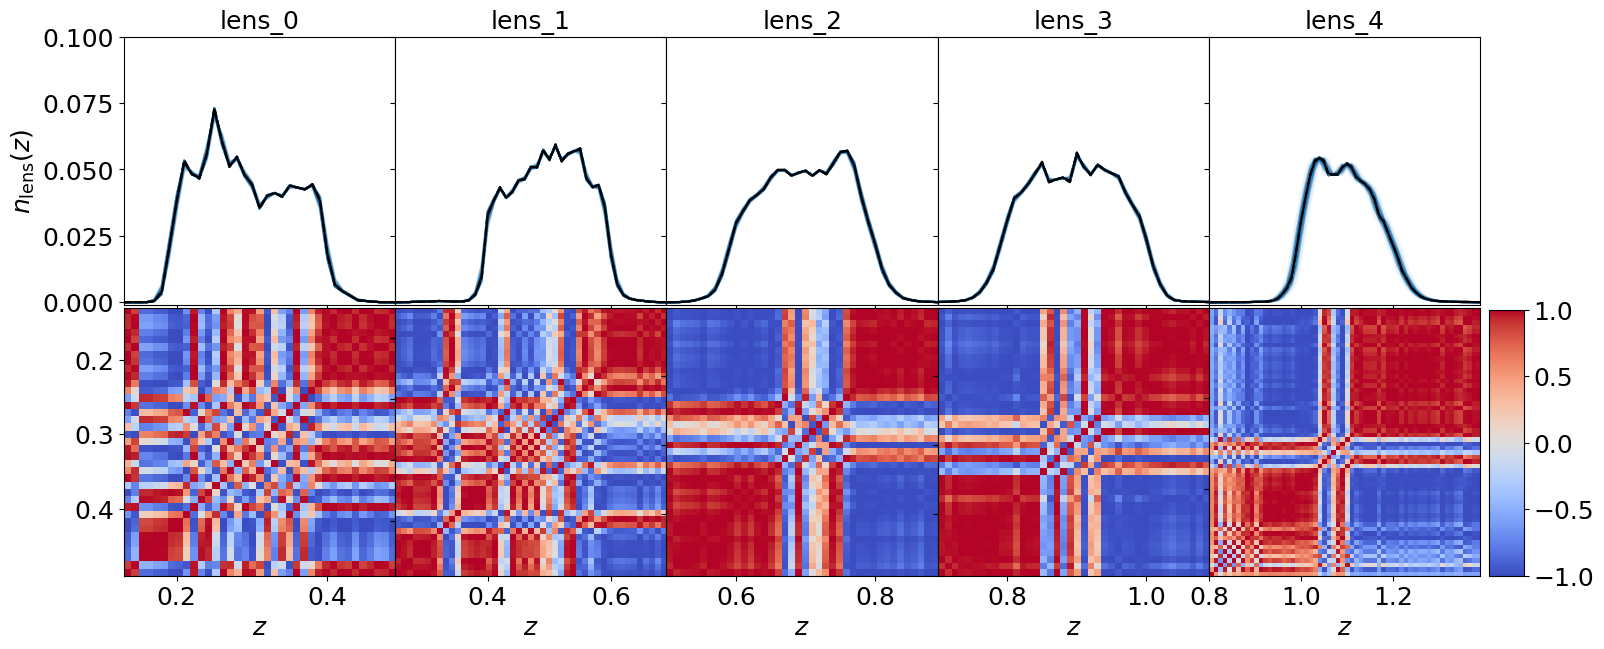

In [18]:
plot_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
make_nzs_plots(ss_qp_shifted.tracers, plot_tracers)

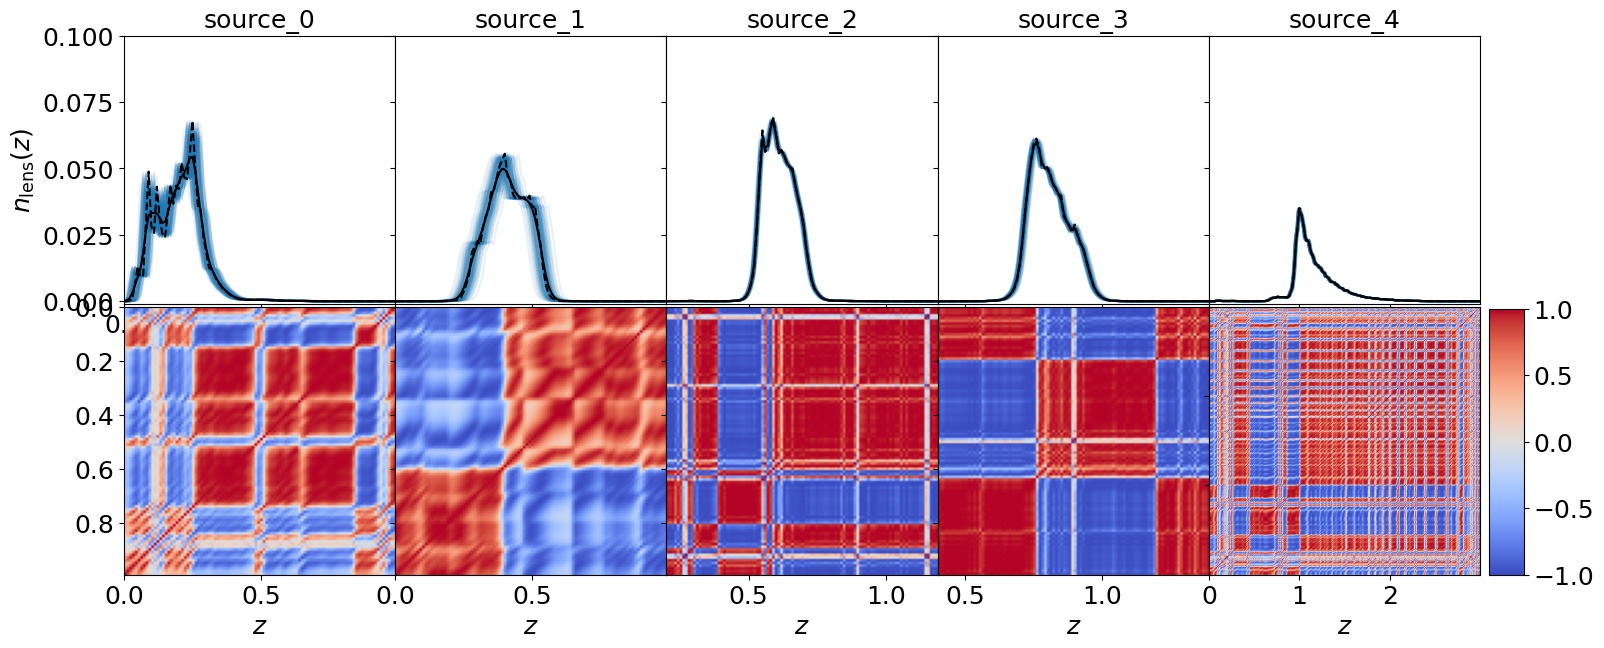

In [19]:
plot_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
make_nzs_plots(ss_qp_shifted.tracers, plot_tracers)

## Shifts & widths

In [20]:
SnWs_priors = nzp.PriorSacc(ss_qp, 
                            model="ShiftsWidths",
                            compute_crosscorrs=crosscorrs_method)

Making model for  source_0
Making model for  source_1
Making model for  source_2
Making model for  source_3
Making model for  source_4
Making model for  lens_0
Making model for  lens_1
Making model for  lens_2
Making model for  lens_3
Making model for  lens_4


In [21]:
labels = np.array([
    r"\Delta z^{\rm source \, 0}",
    r"w_z^{\rm source \, 0}",
    r"\Delta z^{\rm source \, 1}",
    r"w_z^{\rm source \, 1}",
    r"\Delta z^{\rm source \, 2}",
    r"w_z^{\rm source \, 2}",
    r"\Delta z^{\rm source \, 3}",
    r"w_z^{\rm source \, 3}",
    r"\Delta z^{\rm source \, 4}",
    r"w_z^{\rm source \, 4}",
    r"\Delta z^{\rm lens \, 0}",
    r"w_z^{\rm lens \, 0}",
    r"\Delta z^{\rm lens \, 1}",
    r"w_z^{\rm lens \, 1}",
    r"\Delta z^{\rm lens \, 2}",
    r"w_z^{\rm lens \, 2}",
    r"\Delta z^{\rm lens \, 3}",
    r"w_z^{\rm lens \, 3}",
    r"\Delta z^{\rm lens \, 4}",
    r"w_z^{\rm lens \, 4}"
])

In [22]:
order = [0, 2, 4, 6, 8, 1, 3, 5, 7, 9,
        10, 12, 14, 16, 18, 11, 13, 15, 17, 19]

Order:  [0, 2, 4, 6, 8, 1, 3, 5, 7, 9, 10, 12, 14, 16, 18, 11, 13, 15, 17, 19]
Removed no burn in
Removed no burn in


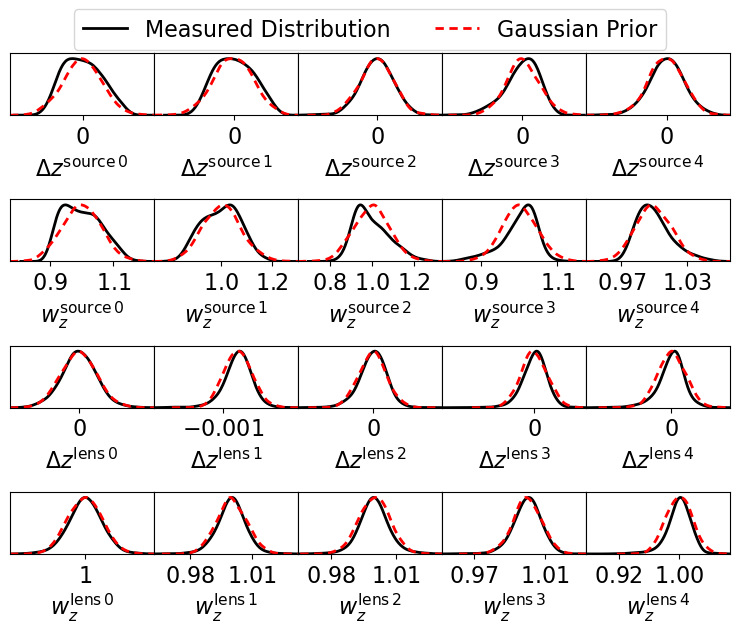

In [23]:
g = SnWs_priors.plot_prior(
    order=order,
    labels=labels, 
    mode="1D", 
    nx=5, 
    legend_ncol=2, 
    lws=2, 
    ls=['-','--'])
g.export("/home/jaimerzp/Documents/UCL/3x2_analytical/paper_plots/SnWs_prior.pdf")

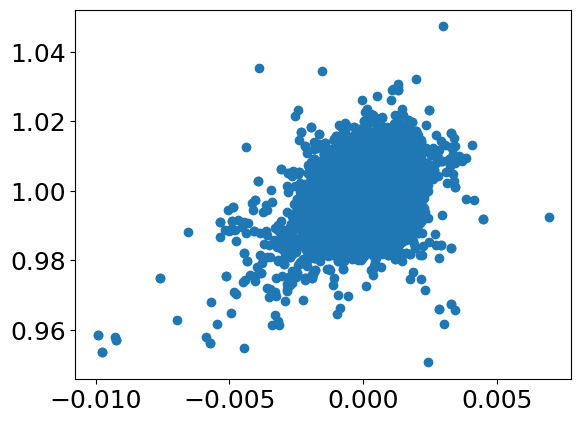

In [24]:
plt.scatter(np.array(SnWs_priors.model_objs['lens_3'].shifts),
            np.array(SnWs_priors.model_objs['lens_3'].widths))

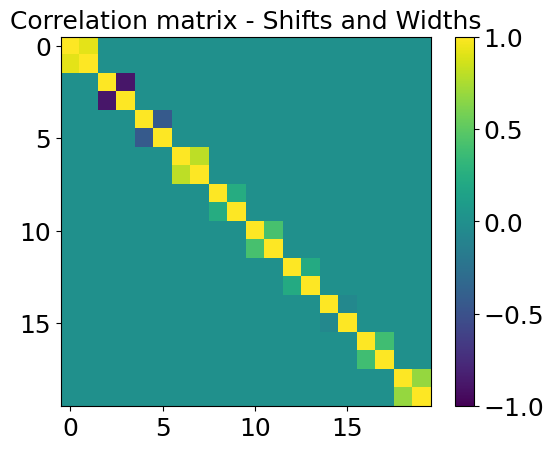

In [25]:
mean, cov, chol = SnWs_priors.get_prior()
err = np.sqrt(np.diag(cov))
corr = cov/np.outer(err, err) 
plt.imshow(corr, vmin=-1, vmax=1)
plt.title("Correlation matrix - Shifts and Widths")
plt.colorbar()

In [26]:
SnWs_nzs = {}
for i in range(2000):
    prior_sample = SnWs_priors.sample_prior()
    for tracer_name in list(ss_qp.tracers.keys()):
        model_obj = SnWs_priors.model_objs[tracer_name]
        z = model_obj.z
        nz = model_obj.nz_mean
        param_names = model_obj.get_params_names()
        nz_names = [tracer_name + "__"  + name for name in param_names]
        s, w = [prior_sample[nz_name] for nz_name in nz_names]
        shifted_nz = nzp.shift_and_width_model(z, nz, s, w)
        if i == 0:
            SnWs_nzs[tracer_name] = [z, shifted_nz]
        else:

            SnWs_nzs[tracer_name] = [z, np.vstack([SnWs_nzs[tracer_name][1], shifted_nz])]

In [27]:
SnWs_ss_qp = update_sacc_qp(ss_qp, SnWs_nzs)

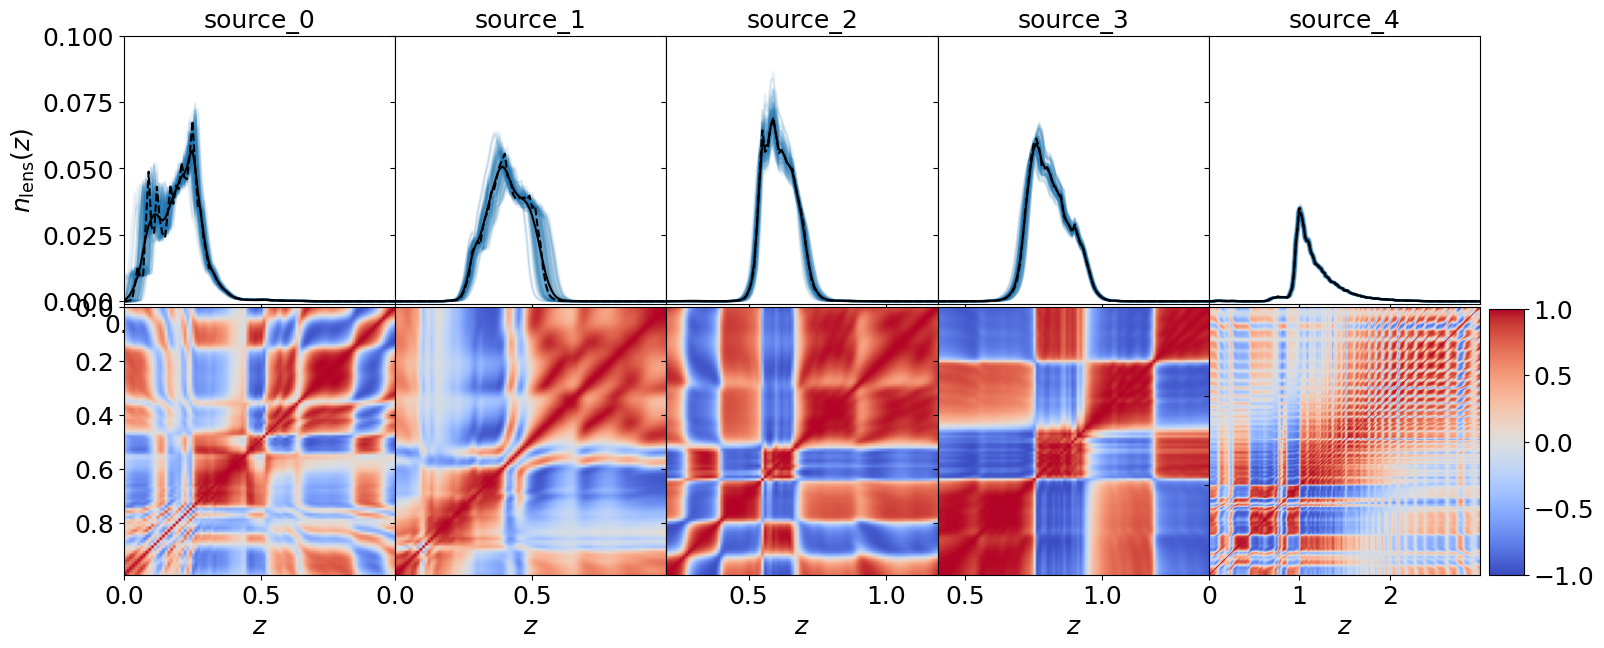

In [28]:
plot_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
make_nzs_plots(SnWs_ss_qp.tracers, plot_tracers)

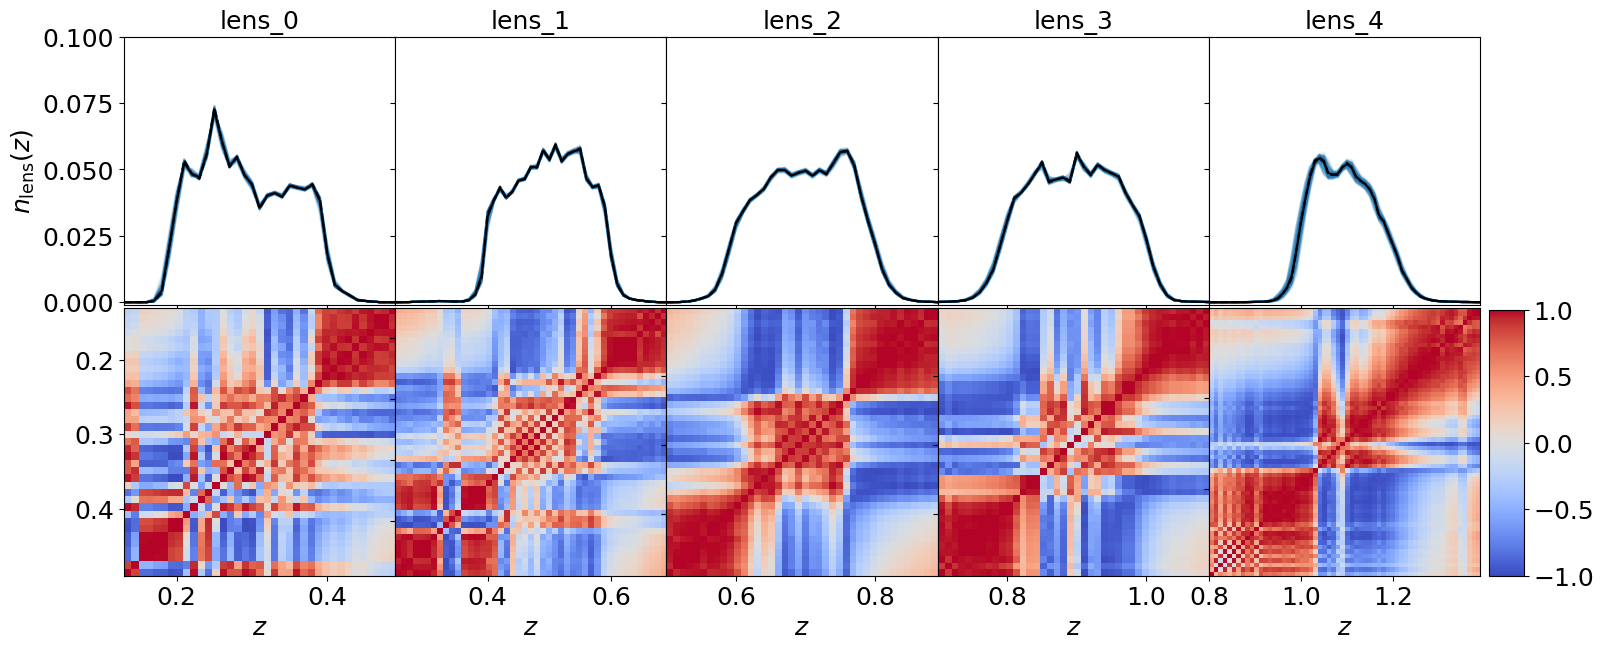

In [29]:
plot_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
make_nzs_plots(SnWs_ss_qp.tracers, plot_tracers)

## GP

In [30]:
n=5
gp_priors = nzp.PriorSacc(ss_qp,
                            model="GP",
                            compute_crosscorrs=crosscorrs_method,
                            n=n)

Making model for  source_0
Making model for  source_1
Making model for  source_2
Making model for  source_3
Making model for  source_4
Making model for  lens_0
Making model for  lens_1
Making model for  lens_2
Making model for  lens_3
Making model for  lens_4


In [31]:
self = gp_priors.model_objs['source_1']
n1, m1 = self.Ws.shape
n2, m2 = self.nzs.shape
nzqs = np.zeros((n1, m2 + m1))
nzqs[:, :m2] = self.nzs
nzqs[:, m2:] = self.Ws
nzq_mean = np.mean(nzqs, axis=0)
dnzqs = nzqs - nzq_mean
cov_zzqq = np.cov(dnzqs.T)
cov_zz = cov_zzqq[:len(self.nz_mean), :len(self.nz_mean)]
cov_qq = cov_zzqq[len(self.nz_mean) :, len(self.nz_mean) :]
cov_zq = cov_zzqq[: len(self.nz_mean), len(self.nz_mean) :]
inv_cov_qq = np.linalg.pinv(cov_qq)
wiener = np.dot(cov_zq, inv_cov_qq)

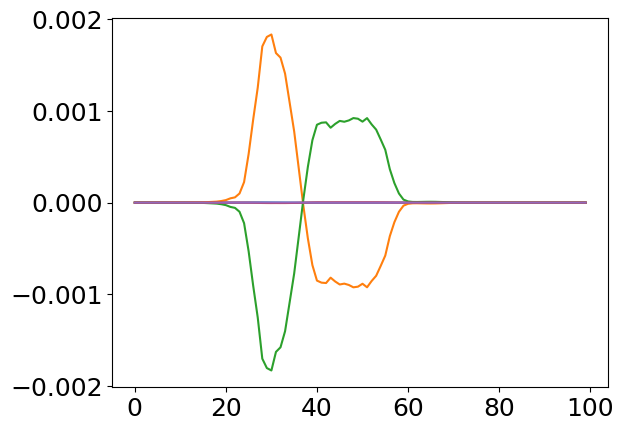

In [32]:
plt.plot(cov_zq);

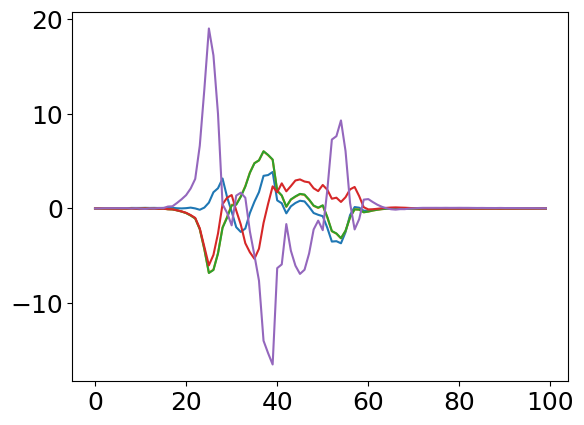

In [33]:
plt.plot(wiener);

The covariance matrix will be regularized
The covariance matrix will be regularized
The covariance matrix will be regularized
The covariance matrix will be regularized
The covariance matrix will be regularized
The covariance matrix will be regularized


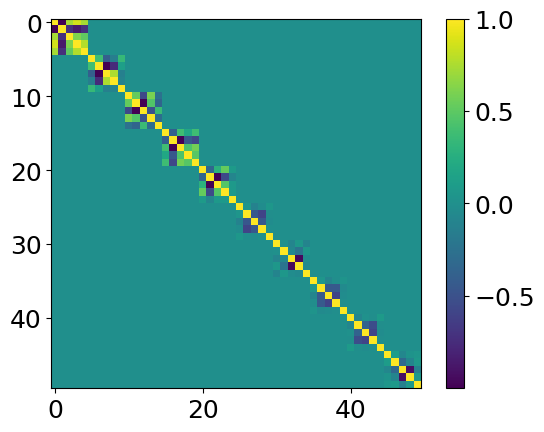

In [34]:
mean, cov, chol = gp_priors.get_prior()
err = np.sqrt(np.diag(cov))
corr = cov/np.outer(err, err) 
plt.imshow(corr)
plt.colorbar()

In [35]:
labels = [
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm source \, 0}" for q in gp_priors.model_objs['source_0'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm source \, 1}" for q in gp_priors.model_objs['source_1'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm source \, 2}" for q in gp_priors.model_objs['source_2'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm source \, 3}" for q in gp_priors.model_objs['source_3'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm source \, 4}" for q in gp_priors.model_objs['source_4'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm lens \, 0}" for q in gp_priors.model_objs['lens_0'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm lens \, 1}" for q in gp_priors.model_objs['lens_1'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm lens \, 2}" for q in gp_priors.model_objs['lens_2'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm lens \, 3}" for q in gp_priors.model_objs['lens_3'].q],
    [r"\alpha_{"+ "z={i}".format(i=round(q, 3))+r"}^{\rm lens \, 4}" for q in gp_priors.model_objs['lens_4'].q],
]
labels = np.array(labels).flatten()

Removed no burn in
Removed no burn in


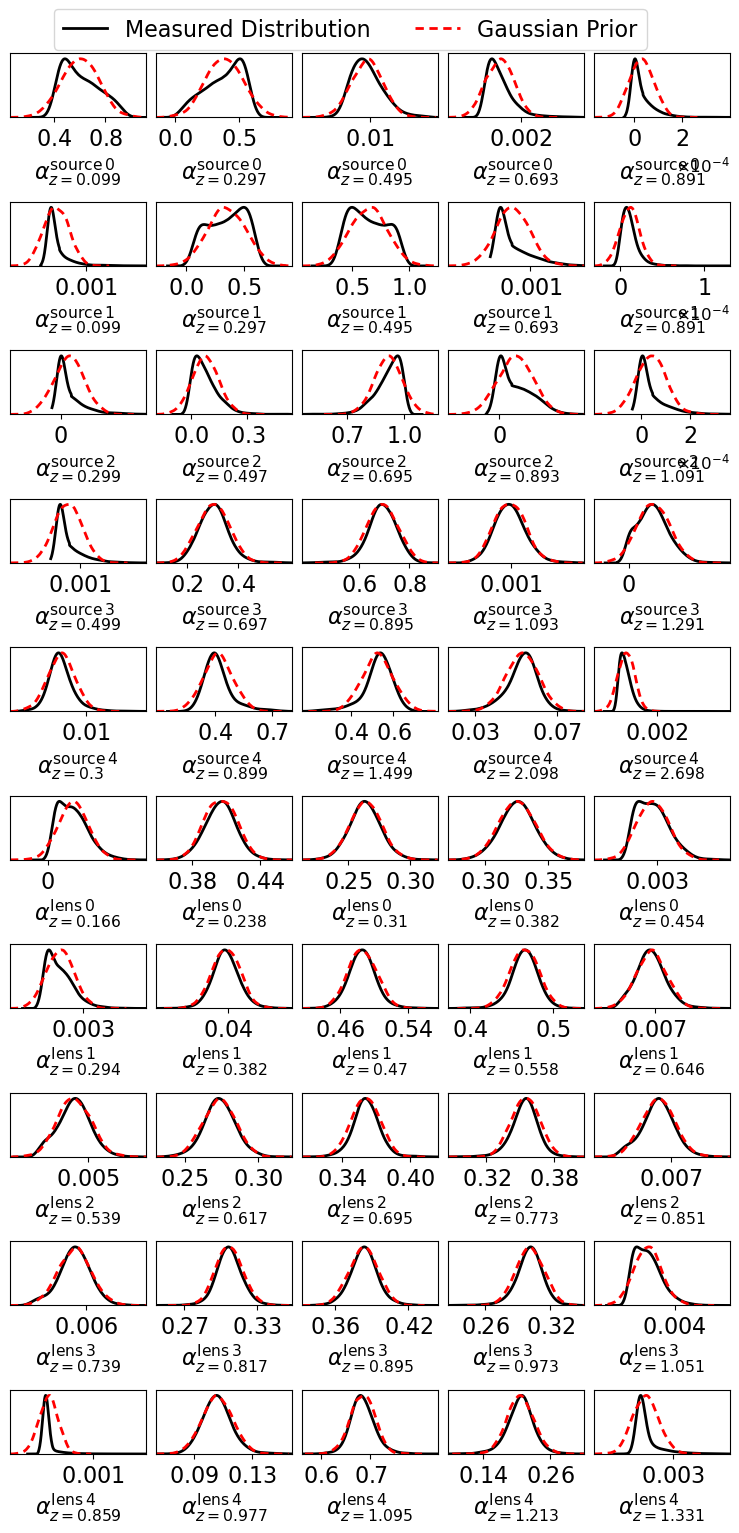

In [36]:
g = gp_priors.plot_prior(mode="1D", add_prior=True, labels=labels, nx=5, legend_ncol=2, lws=2, ls=['-','--'])
g.export("/home/jaimerzp/Documents/UCL/3x2_analytical/paper_plots/gp_priors.pdf")

In [37]:
gp_nzs = {}
for tracer_name in list(ss_qp.tracers.keys()):
    model_obj = gp_priors.model_objs[tracer_name]
    nz_mean = model_obj.nz_mean
    z = model_obj.z
    _, _, chol = model_obj.get_prior()
    W = model_obj.funcs
    W = W @ chol
    _nzs = np.array([nzp.linear_model(nz_mean, W, np.random.randn(n)) for i in range(2000)])
    gp_nzs[tracer_name] = [z, _nzs]

In [38]:
gp_ss_qp = update_sacc_qp(ss_qp, gp_nzs)

/tmp/ipykernel_72705/454088342.py:16: RuntimeWarning: invalid value encountered in divide
  corr = cov/np.outer(err, err)


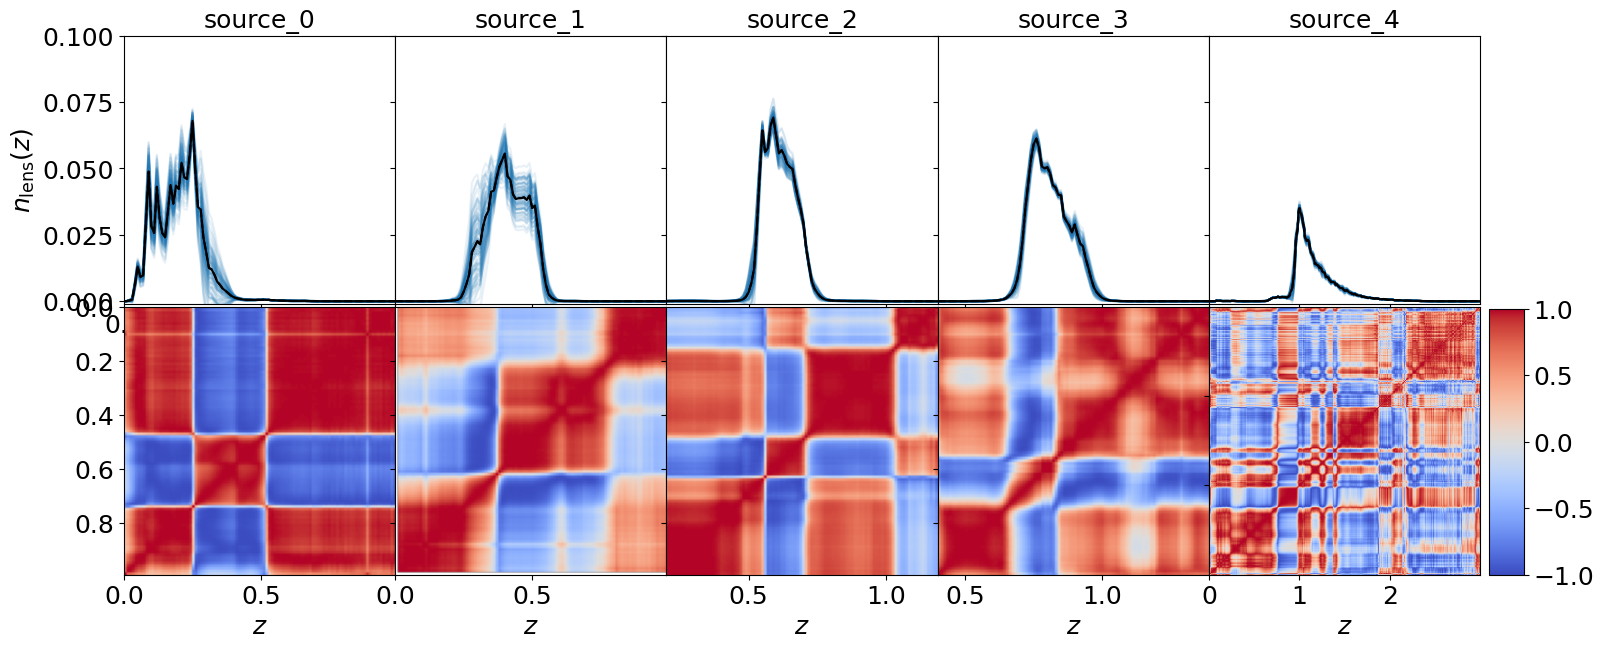

In [39]:
plot_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
make_nzs_plots(gp_ss_qp.tracers, plot_tracers)

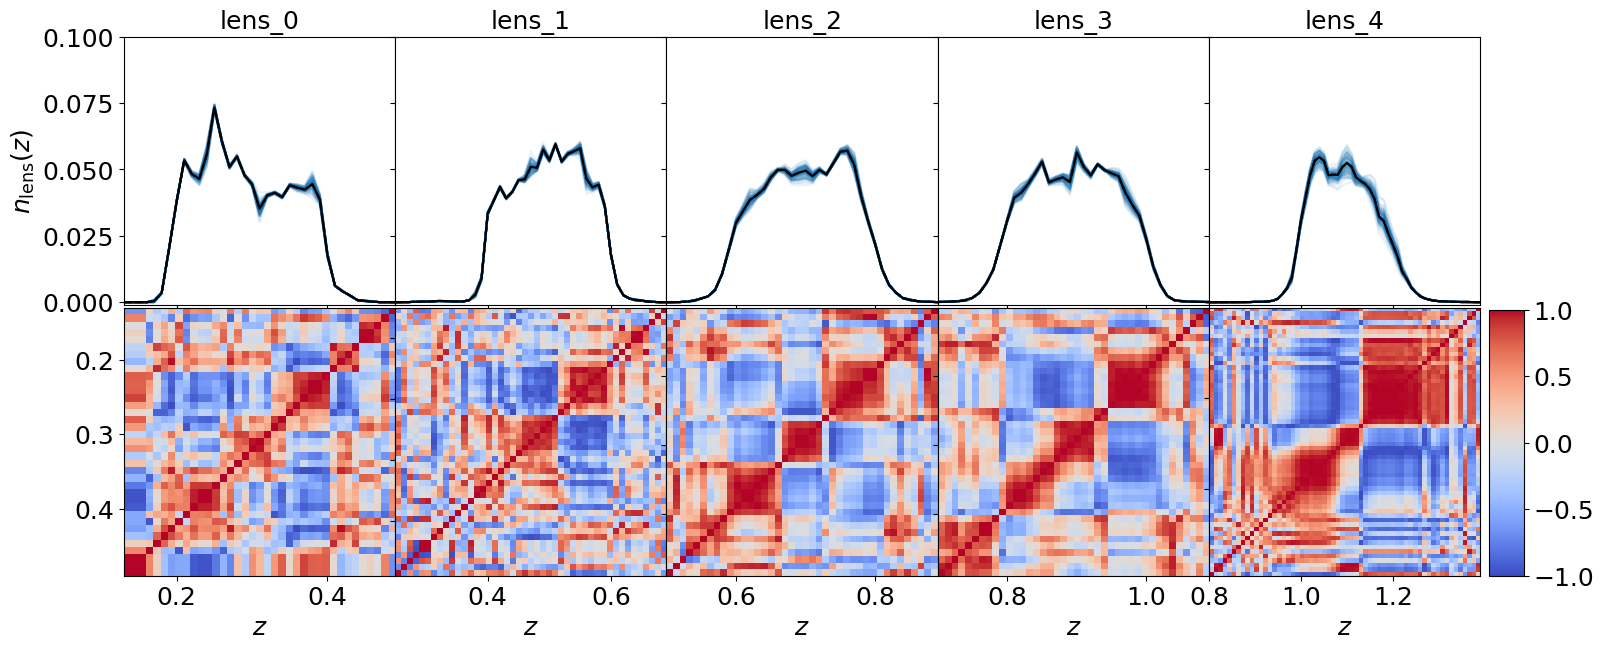

In [40]:
plot_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
make_nzs_plots(gp_ss_qp.tracers, plot_tracers)

# PCA

In [41]:
PCA_priors = nzp.PriorSacc(ss_qp,
                            model="PCA",
                            compute_crosscorrs=crosscorrs_method,
                            n=n)

Making model for  source_0
Making model for  source_1
Making model for  source_2
Making model for  source_3
Making model for  source_4
Making model for  lens_0
Making model for  lens_1
Making model for  lens_2
Making model for  lens_3
Making model for  lens_4


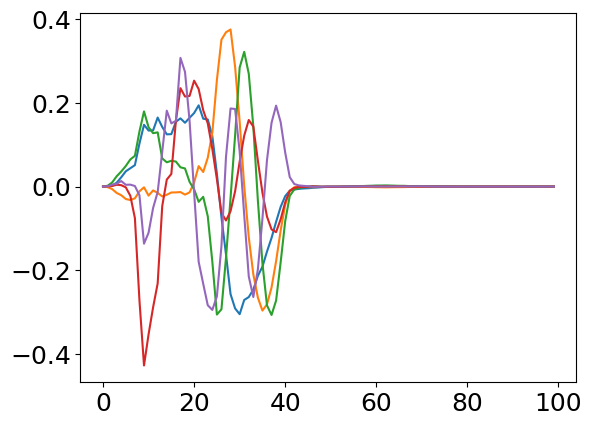

In [42]:
plt.plot(PCA_priors.model_objs['source_0'].funcs);

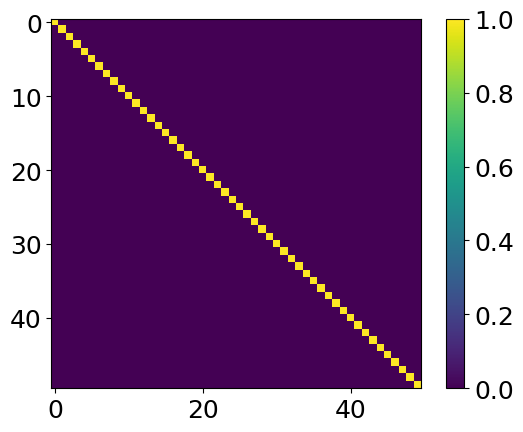

In [43]:
mean, cov, chol = PCA_priors.get_prior()
err = np.sqrt(np.diag(cov))
corr = cov/np.outer(err, err) 
plt.imshow(np.sqrt(abs(corr)))
plt.colorbar()

In [44]:
labels = [
    r"\alpha_{1}^{\rm source \, 0}",
    r"\alpha_{2}^{\rm source \, 0}",
    r"\alpha_{3}^{\rm source \, 0}",
    r"\alpha_{4}^{\rm source \, 0}",
    r"\alpha_{5}^{\rm source \, 0}",
    r"\alpha_{1}^{\rm source \, 1}",
    r"\alpha_{2}^{\rm source \, 1}",
    r"\alpha_{3}^{\rm source \, 1}",
    r"\alpha_{4}^{\rm source \, 1}",
    r"\alpha_{5}^{\rm source \, 1}",
    r"\alpha_{1}^{\rm source \, 2}",
    r"\alpha_{2}^{\rm source \, 2}",
    r"\alpha_{3}^{\rm source \, 2}",
    r"\alpha_{4}^{\rm source \, 2}",
    r"\alpha_{5}^{\rm source \, 2}",
    r"\alpha_{1}^{\rm source \, 3}",
    r"\alpha_{2}^{\rm source \, 3}",
    r"\alpha_{3}^{\rm source \, 3}",
    r"\alpha_{4}^{\rm source \, 3}",
    r"\alpha_{5}^{\rm source \, 3}",
    r"\alpha_{1}^{\rm source \, 4}",
    r"\alpha_{2}^{\rm source \, 4}",
    r"\alpha_{3}^{\rm source \, 4}",
    r"\alpha_{4}^{\rm source \, 4}",
    r"\alpha_{5}^{\rm source \, 4}",
    r"\alpha_{1}^{\rm lens \, 0}",
    r"\alpha_{2}^{\rm lens \, 0}",
    r"\alpha_{3}^{\rm lens \, 0}",
    r"\alpha_{4}^{\rm lens \, 0}",
    r"\alpha_{5}^{\rm lens \, 0}",
    r"\alpha_{1}^{\rm lens \, 1}",
    r"\alpha_{2}^{\rm lens \, 1}",
    r"\alpha_{3}^{\rm lens \, 1}",
    r"\alpha_{4}^{\rm lens \, 1}",
    r"\alpha_{5}^{\rm lens \, 1}",
    r"\alpha_{1}^{\rm lens \, 2}",
    r"\alpha_{2}^{\rm lens \, 2}",
    r"\alpha_{3}^{\rm lens \, 2}",
    r"\alpha_{4}^{\rm lens \, 2}",
    r"\alpha_{5}^{\rm lens \, 2}",
    r"\alpha_{1}^{\rm lens \, 3}",
    r"\alpha_{2}^{\rm lens \, 3}",
    r"\alpha_{3}^{\rm lens \, 3}",
    r"\alpha_{4}^{\rm lens \, 3}",
    r"\alpha_{5}^{\rm lens \, 3}",
    r"\alpha_{1}^{\rm lens \, 4}",
    r"\alpha_{2}^{\rm lens \, 4}",
    r"\alpha_{3}^{\rm lens \, 4}",
    r"\alpha_{4}^{\rm lens \, 4}",
    r"\alpha_{5}^{\rm lens \, 4}",
]

Removed no burn in
Removed no burn in


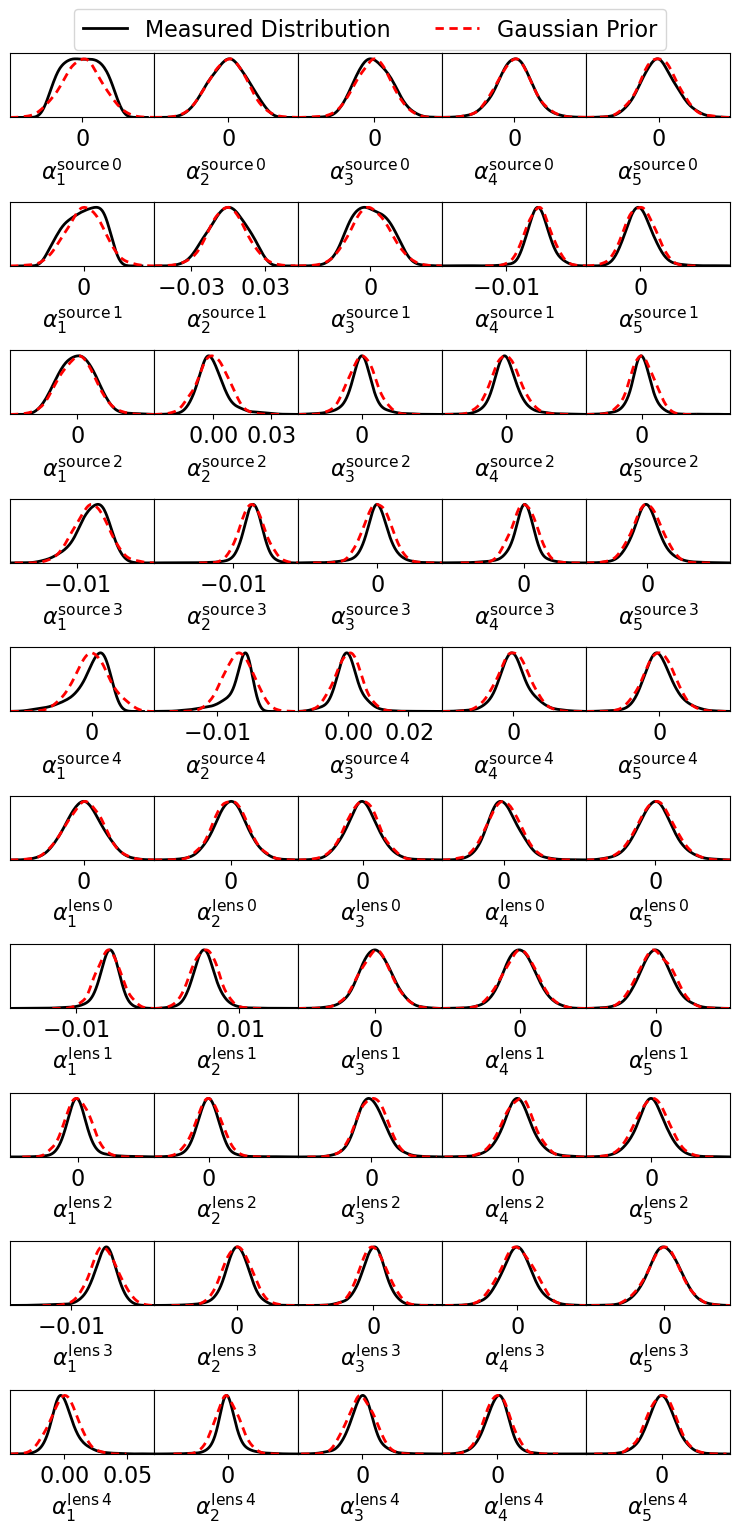

In [45]:
g = PCA_priors.plot_prior(mode="1D", add_prior=True, nx=5, labels=labels, legend_ncol=2, lws=2, ls=['-','--'])
g.export("/home/jaimerzp/Documents/UCL/3x2_analytical/paper_plots/pca_priors.pdf")

In [46]:
pca_nzs = {}
for tracer_name in list(ss_qp.tracers.keys()):
    model_obj = PCA_priors.model_objs[tracer_name]
    nz_mean = model_obj.nz_mean
    _, _, chol = model_obj.get_prior()
    z = model_obj.z
    W = model_obj.funcs
    W = W @ chol
    _nzs = np.array([nzp.linear_model(nz_mean, W, np.random.randn(n)) for i in range(2000)])
    pca_nzs[tracer_name] = [z, _nzs]

In [47]:
pca_ss_qp = update_sacc_qp(ss_qp, pca_nzs)

/tmp/ipykernel_72705/454088342.py:16: RuntimeWarning: invalid value encountered in divide
  corr = cov/np.outer(err, err)


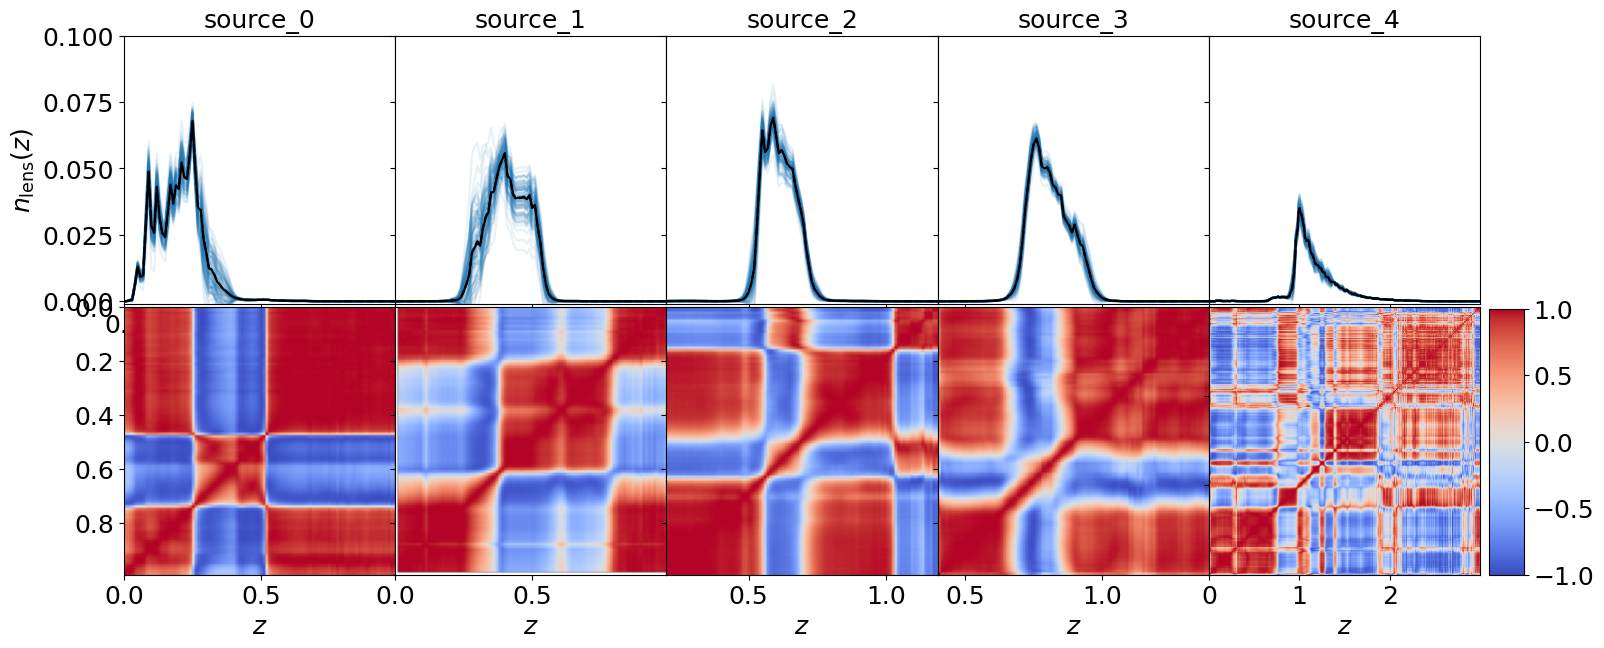

In [48]:
plot_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
make_nzs_plots(pca_ss_qp.tracers, plot_tracers)

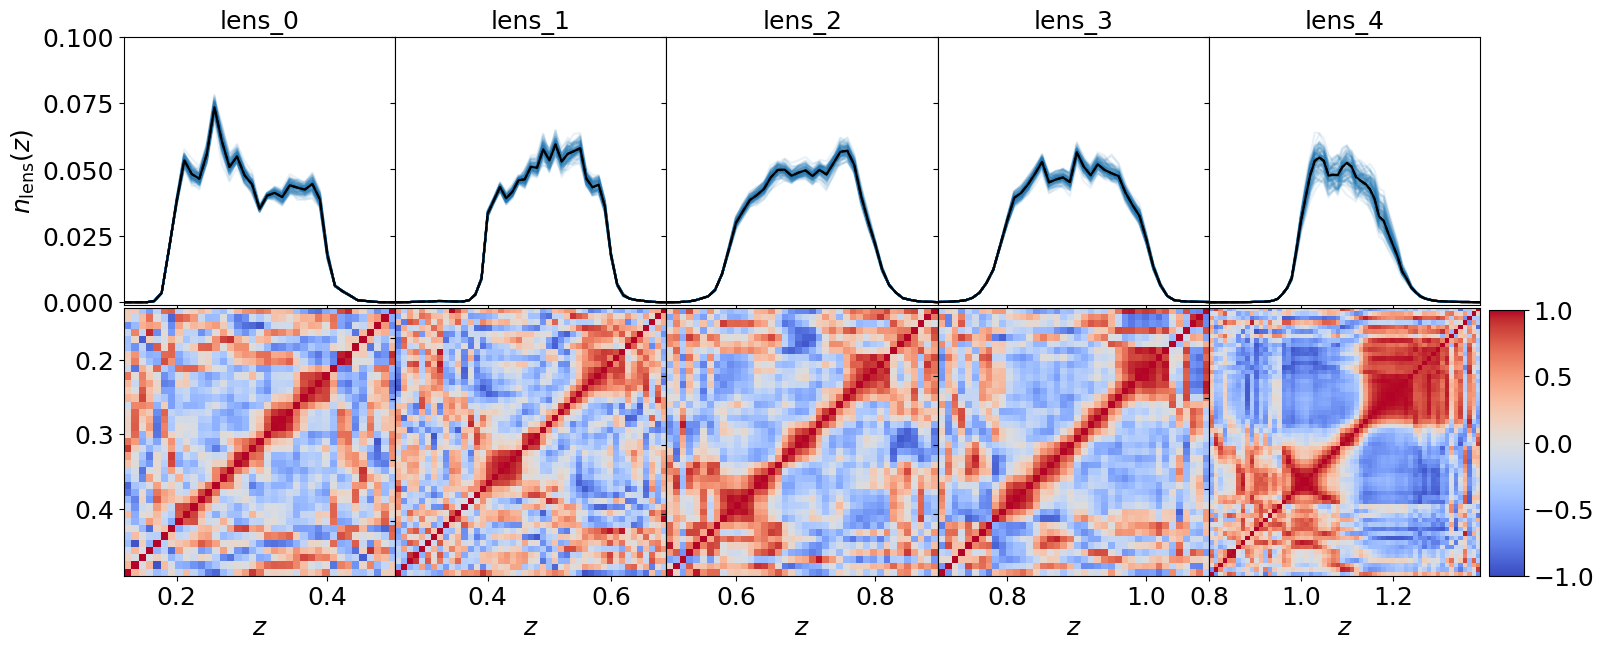

In [49]:
plot_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
make_nzs_plots(pca_ss_qp.tracers, plot_tracers)

# Comparison

In [50]:
def make_nzs_comp_plot(methods, tracer, sacc_file=None):
    n_tracers = len(methods)
    figure, axis = plt.subplots(2, n_tracers, figsize=(n_tracers*3.5,7))
    figure.subplots_adjust(wspace=0, hspace=0.01)
    for i, key in enumerate(methods):
        method = methods[key]
        tomo = method[tracer]
        if i !=0:
            nzs = tomo[1][:50].T
            zs = tomo[0]
        else:
            nzs = tomo.ensemble.objdata()["pdfs"][:50].T
            zs = tomo.z
        nz_mean = np.mean(nzs, axis=1)
        norms = np.sum(nzs, axis=0)
        axis[0,i].plot(zs, nz_mean/np.sum(nz_mean), '-', color="k")
        if sacc_file is not None:
            spec = sacc_file.tracers[tracer]
            photo_dz = np.mean(np.diff(zs))
            spec_dz = np.mean(np.diff(spec.z))
            alpha = photo_dz/spec_dz
            axis[0,i].plot(spec.z, alpha*spec.nz/np.sum(spec.nz), 'k--')
        axis[0,i].plot(zs, nzs/norms, '-', color="C0", alpha=0.1)
        cov = np.cov(nzs)
        err = np.sqrt(np.diag(cov))
        corr = cov/np.outer(err, err)
        axis[0,i].set_xlim([min(zs), max(zs)])
        axis[0,i].set_ylim([-0.001, 0.1])
        axis[0,i].set_title(key, y=0.9)
        if i == 0:
            axis[0,i].set_ylabel(r'$n_{\rm source \, 0}(z)$')
        else:
            axis[0,i].set_yticklabels([])
            axis[1,i].set_yticklabels([])
        im = axis[1,i].imshow(corr, aspect='auto',
                            origin='lower', cmap='coolwarm',
                             vmin=-1, vmax=1,
                            extent=[min(zs), max(zs), max(zs), min(zs)])
        axis[1,i].set_xlabel(r'$z$')

    cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
    figure.colorbar(im, cax=cbar_ax)
    plt.show()
    return figure

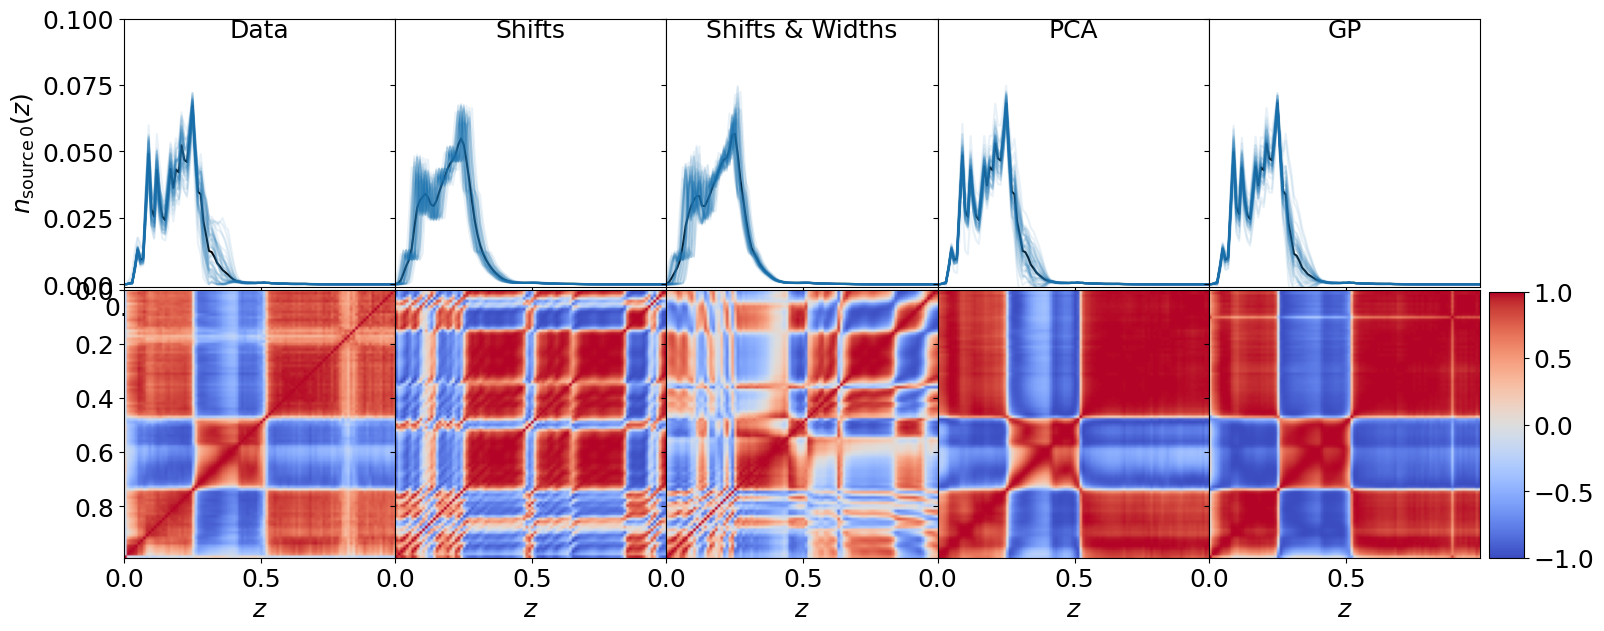

In [51]:
g = make_nzs_comp_plot({'Data': ss_qp.tracers, 'Shifts':shifted_nzs, 'Shifts & Widths':SnWs_nzs, 'PCA':pca_nzs, 'GP':gp_nzs}, 'source_0')
g.savefig("/home/jaimerzp/Documents/UCL/3x2_analytical/paper_plots/source_0_validation.pdf", bbox_inches='tight')

In [52]:
def comp_diag(methods, tracers, sacc_file=None):
    n_tracers = len(tracers)
    figure, axis = plt.subplots(1, n_tracers, figsize=(n_tracers*5,5))
    figure.subplots_adjust(wspace=0, hspace=0.01)
    print(tracers)
    for i, tracer in enumerate(tracers):
        print(tracer)
        for j, key in enumerate(methods):
            method = methods[key]
            tomo = method[tracer]
            if j !=0:
                nzs = tomo[1].T
                zs = tomo[0]
            else:
                nzs = tomo.ensemble.objdata()["pdfs"].T
                zs = tomo.z
            nzs /= np.sum(nzs, axis=0)
            cov = np.cov(nzs)
            err = np.diag(cov)
            axis[i].plot(zs, err, '-', alpha=0.8)
            axis[i].set_xlim([min(zs), max(zs)])
            #axis[i].set_ylim([-0.001, 0.1])
            axis[i].set_yscale('log')
            axis[i].set_title(tracer, y=0.9)
    plt.show()
    return figure

['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
lens_0
lens_1
lens_2
lens_3
lens_4


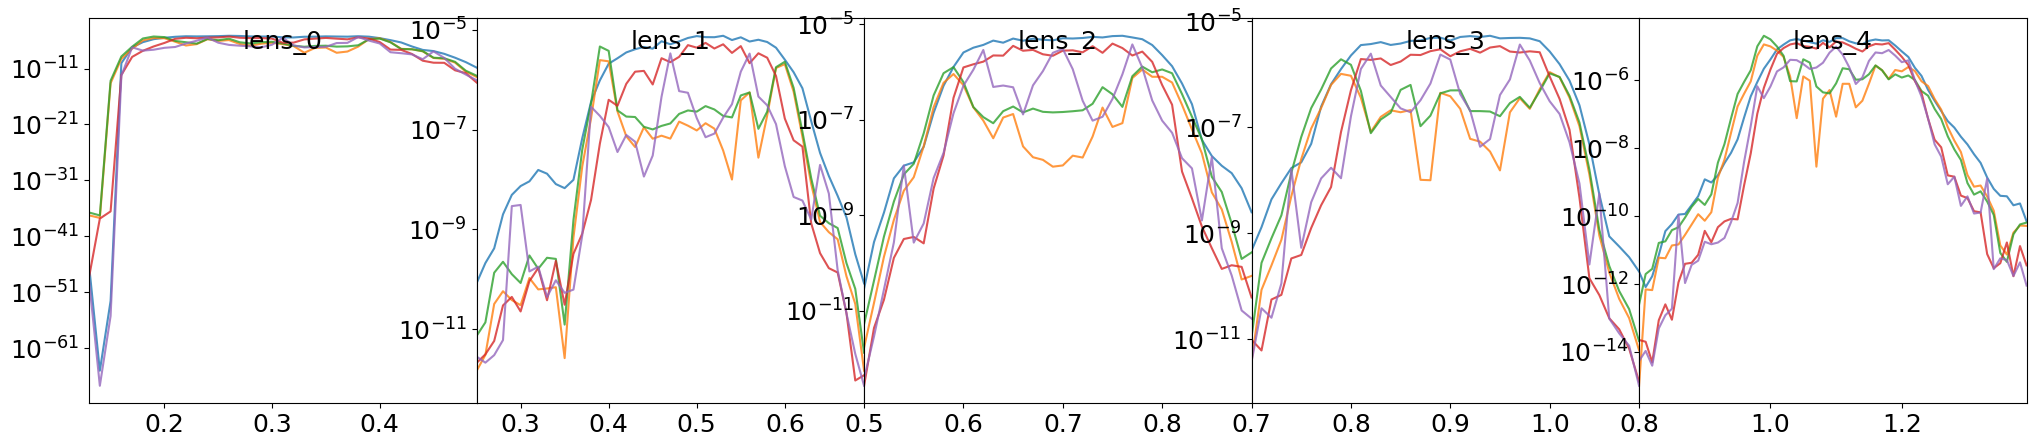

In [53]:
g = comp_diag({
    'Data': ss_qp.tracers,
    'Shifts':shifted_nzs,
    'Shifts & Widths':SnWs_nzs,
    'PCA':pca_nzs, 
    'GP':gp_nzs},
    ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4'],)


['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
source_0
source_1
source_2
source_3
source_4


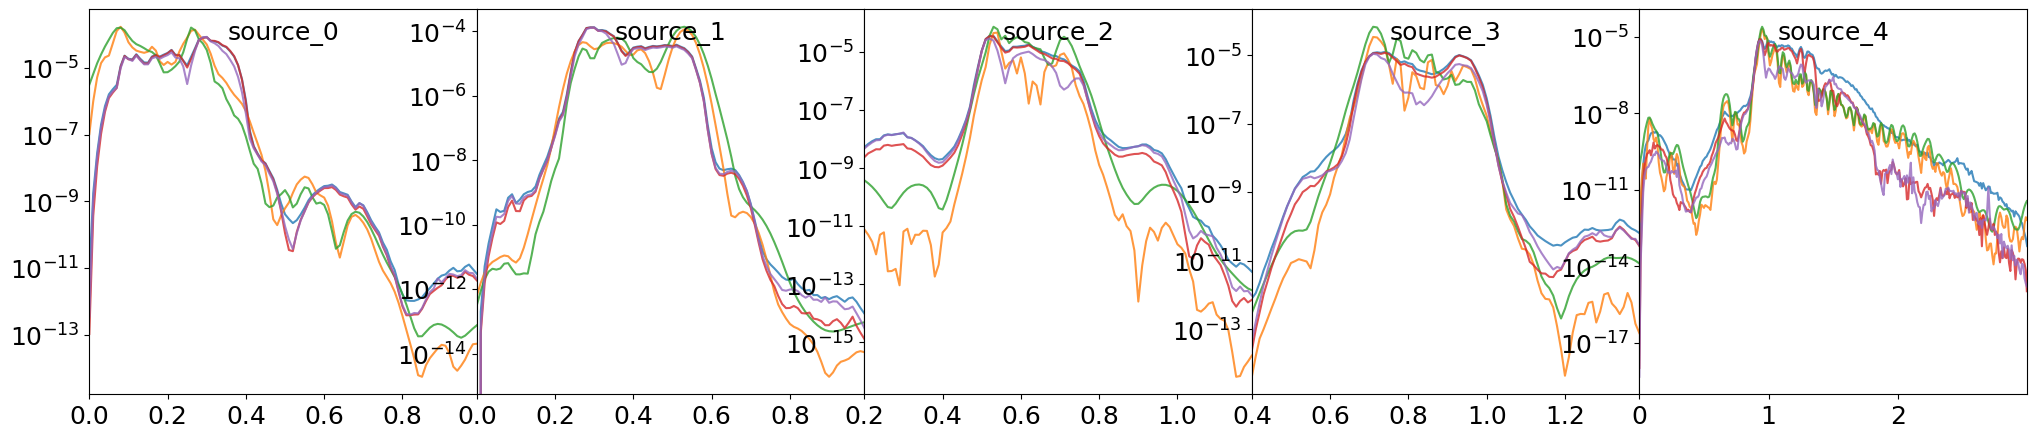

In [54]:
g = comp_diag({
    'Data': ss_qp.tracers,
    'Shifts':shifted_nzs,
    'Shifts & Widths':SnWs_nzs,
    'PCA':pca_nzs, 
    'GP':gp_nzs},
    ['source_0','source_1', 'source_2', 'source_3', 'source_4'])


In [55]:
def comp_eig(methods, tracers, sacc_file=None):
    n_tracers = len(tracers)
    figure, axis = plt.subplots(1, n_tracers, figsize=(n_tracers*3.5,5))
    figure.subplots_adjust(wspace=0, hspace=0.01)
    for i, tracer in enumerate(tracers):
        for j, key in enumerate(methods):
            method = methods[key]
            tomo = method[tracer]
            if j !=0:
                nzs = tomo[1].T
                zs = tomo[0]
            else:
                nzs = tomo.ensemble.objdata()["pdfs"].T
                zs = tomo.z
            nzs /= np.sum(nzs, axis=0)
            cov = np.cov(nzs)
            eigvals, _ = np.linalg.eig(cov)
            axis[i].plot(eigvals, '-', alpha=0.8)
            axis[i].set_ylim([1e-12, 1e2])
            axis[i].set_yscale('log')
            axis[i].set_title(tracer, y=0.9)
    plt.show()
    return figure

/home/jaimerzp/anaconda3/envs/gitd/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jaimerzp/anaconda3/envs/gitd/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


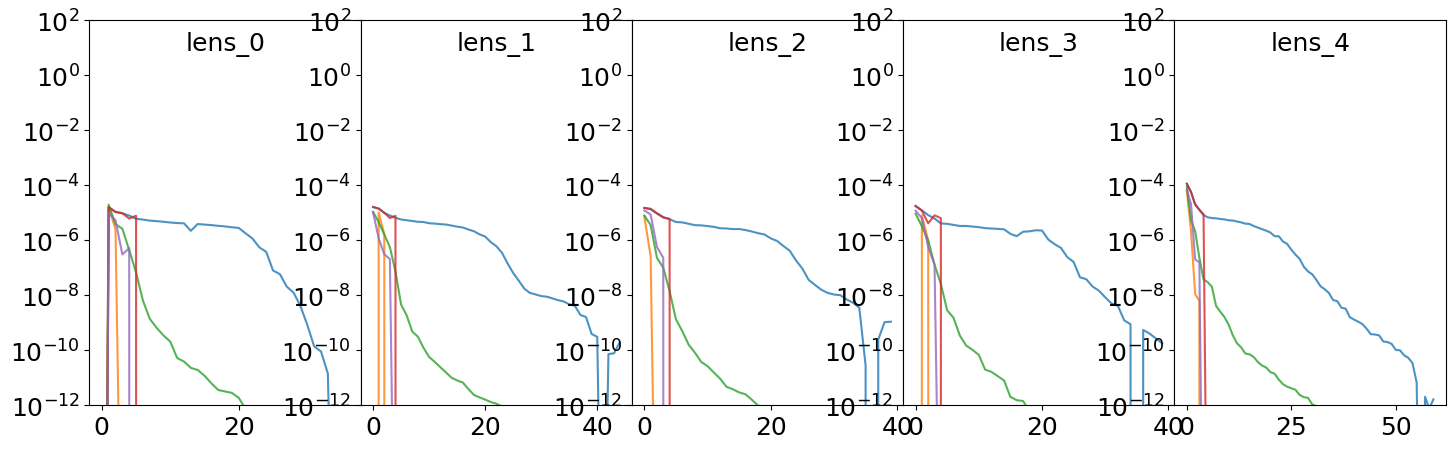

In [56]:
g = comp_eig({
    'Data': ss_qp.tracers,
    'Shifts':shifted_nzs,
    'Shifts & Widths':SnWs_nzs,
    'PCA':pca_nzs, 
    'GP':gp_nzs},
    ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4'],)


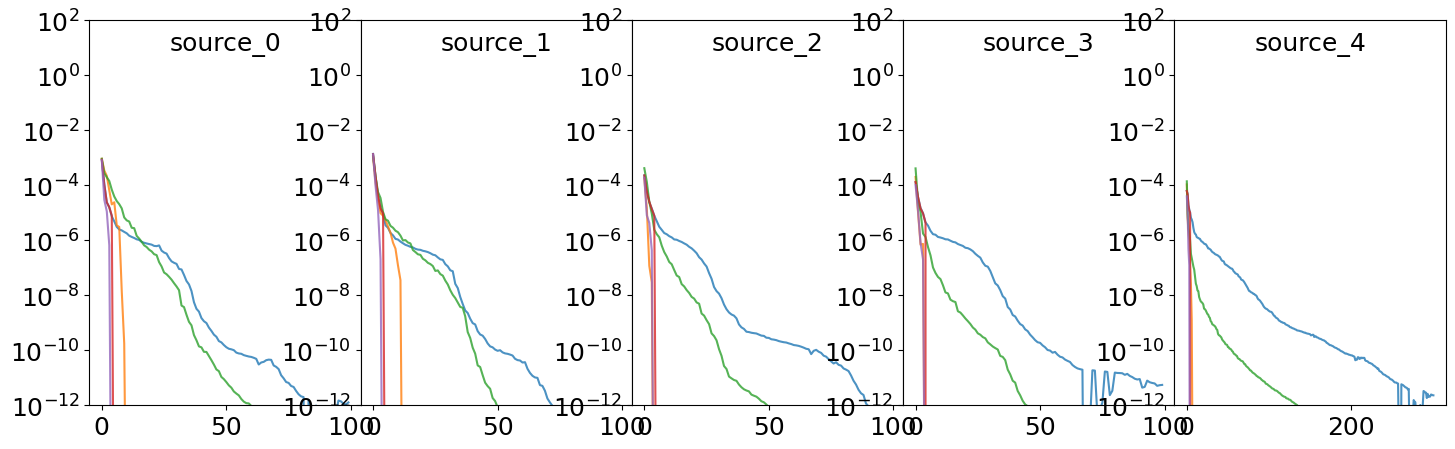

In [57]:
g = comp_eig({
    'Data': ss_qp.tracers,
    'Shifts':shifted_nzs,
    'Shifts & Widths':SnWs_nzs,
    'PCA':pca_nzs, 
    'GP':gp_nzs},
    ['source_0','source_1', 'source_2', 'source_3', 'source_4'])
